In [1]:
# Problem Statement:
# HELP International have been able to raise around $ 10 million. 
# Now the CEO of the NGO needs to decide how to use this money strategically and effectively. 
# So, CEO has to make decision to choose the countries that are in the direst need of aid. 
# Hence, your Job as a Data scientist is to categorise the countries using some 
# socio-economic and health factors that determine the overall development of the country. 
# Then you need to suggest the countries which the CEO needs to focus on the most

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
dataset_org = pd.read_csv('Country-data.csv')
dataset_org.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
dataset_org.shape

(167, 10)

In [5]:
dataset_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
dataset_org.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
dataset_org.isna().sum().sum()

0

In [8]:
dataset_org.duplicated().sum()

0

In [9]:
dataset=dataset_org.drop('country',axis=1)

In [10]:
dataset.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


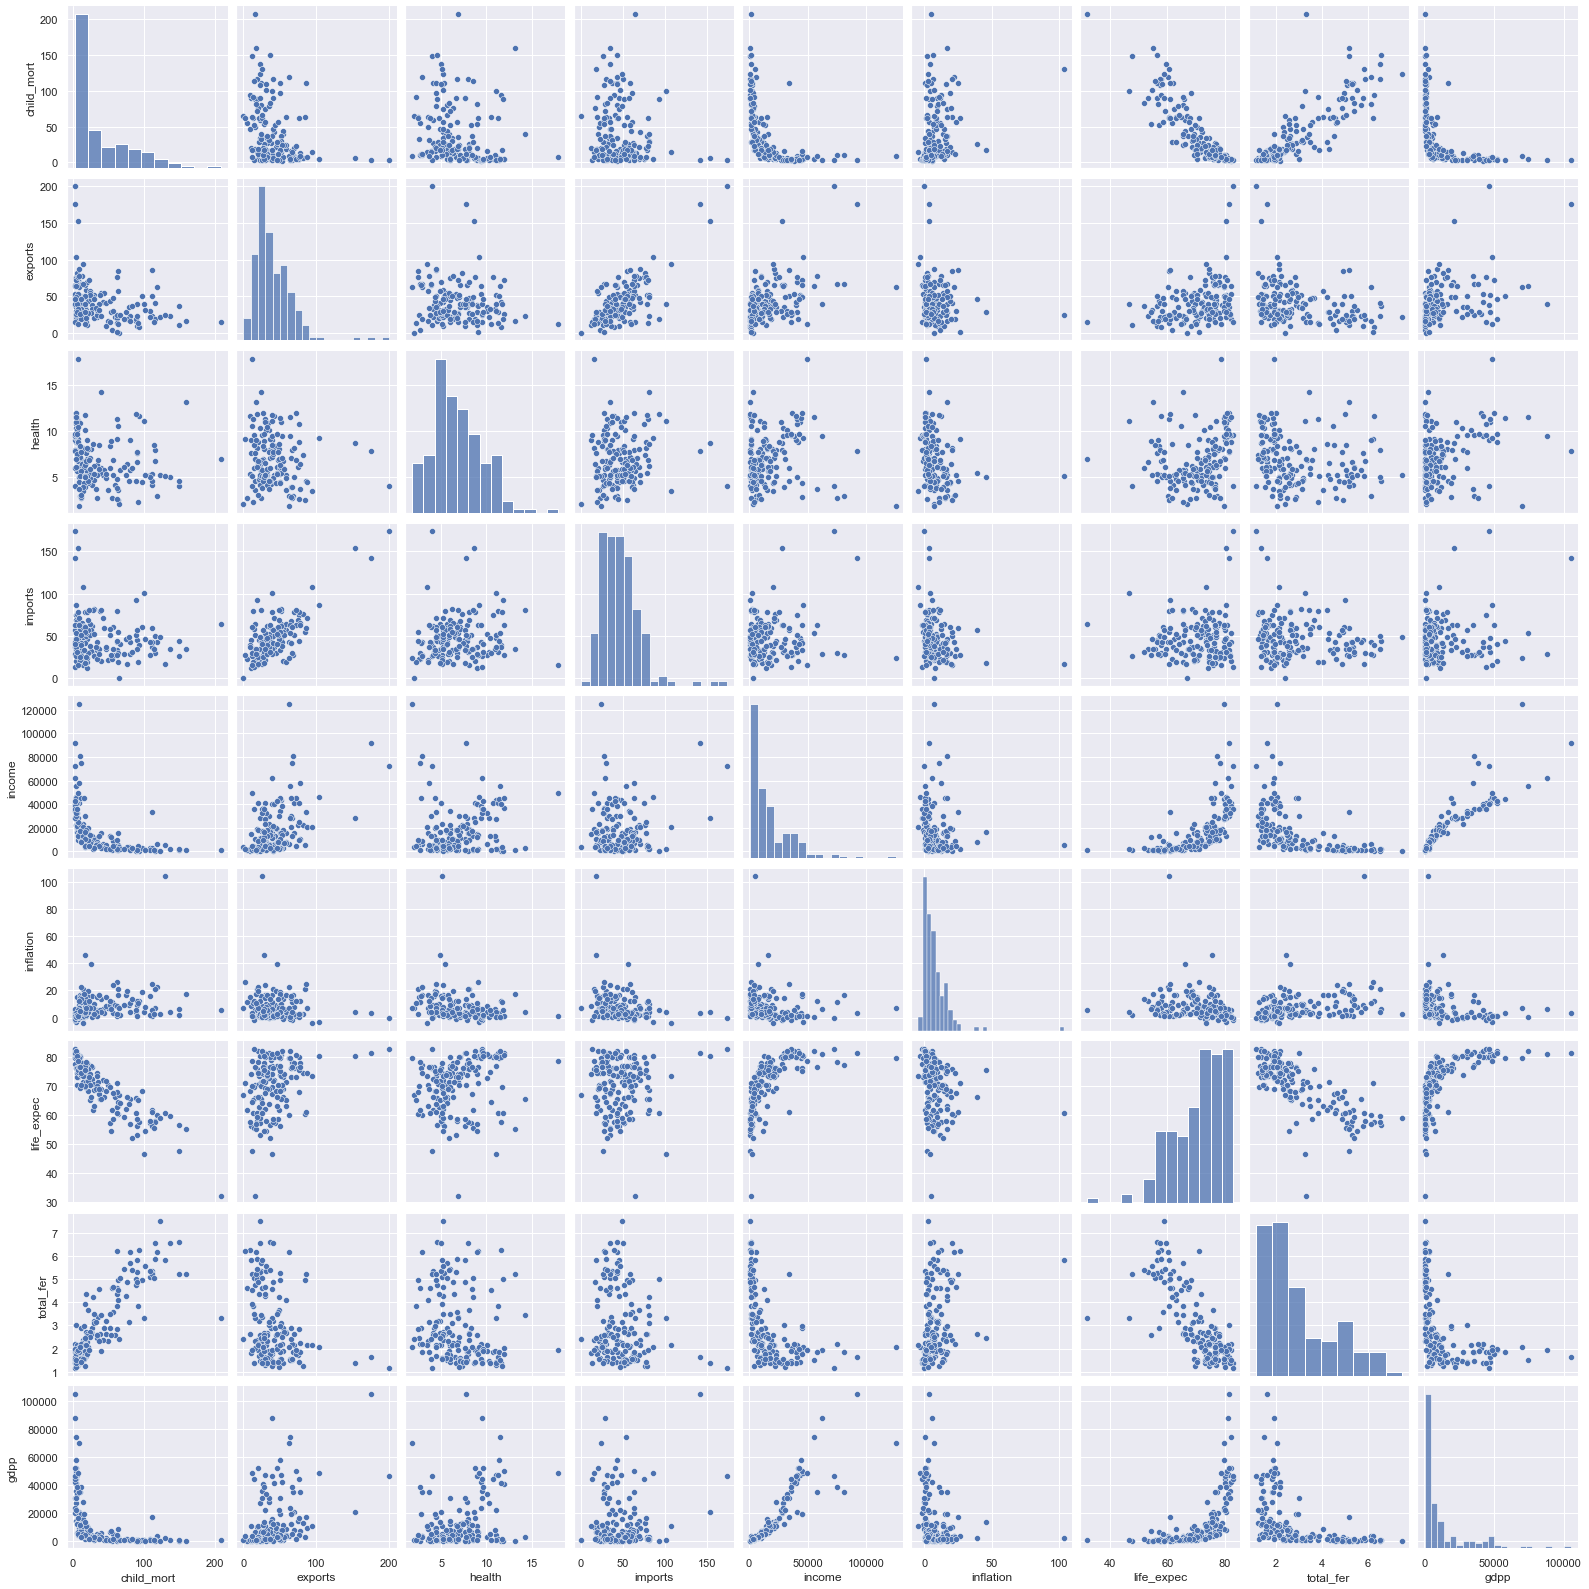

In [11]:
sns.pairplot(dataset)

<AxesSubplot:>

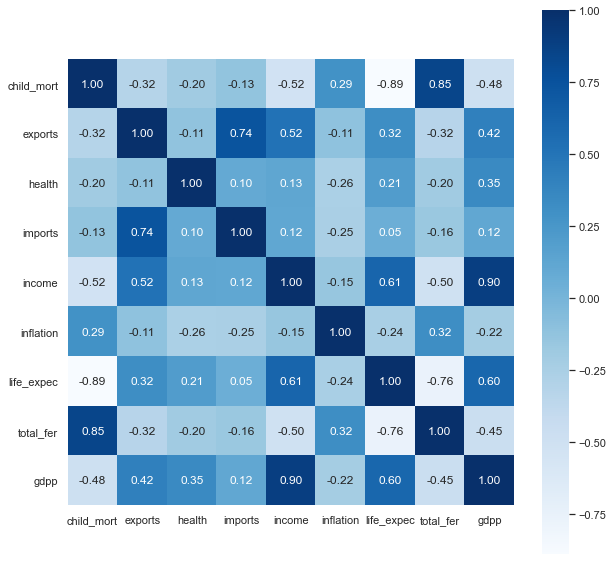

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),cmap='Blues',annot=True,fmt='.2f',
            square=True,yticklabels=dataset.columns,xticklabels=dataset.columns)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dataset_sc=sc.fit_transform(dataset)

In [14]:
from sklearn.decomposition import PCA
pca=PCA(2)
pc=pca.fit_transform(dataset_sc)

<AxesSubplot:>

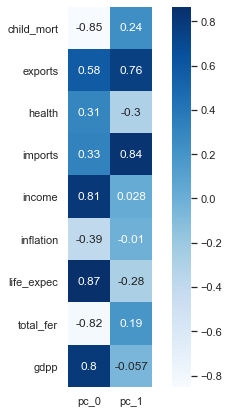

In [15]:
plt.figure(figsize=(7,7))
sns.heatmap(pd.DataFrame(np.c_[dataset_sc,pc]).corr().iloc[:9,9:],cmap='Blues',annot=True,
            square=True,yticklabels=dataset.columns,xticklabels=['pc_0','pc_1'])

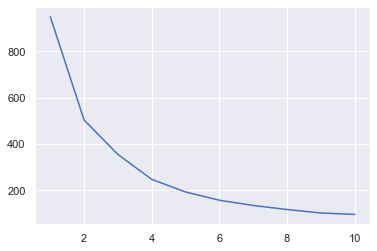

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(i)
    kmeans.fit(pc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

In [17]:
import kneed
kl=kneed.KneeLocator(range(1,11),wcss,curve="convex", direction="decreasing")
kl.elbow

4

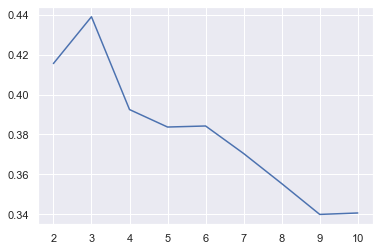

In [18]:
# validation
from sklearn.metrics import silhouette_score
sil_coeff=[]
for i in range(2,11):
    kmeans_sil=KMeans(i)
    kmeans_sil.fit(pc)
    score=silhouette_score(pc,kmeans_sil.labels_)
    sil_coeff.append(score)
plt.plot(range(2,11),sil_coeff)

Text(0, 0.5, 'pc_1: exports, imports')

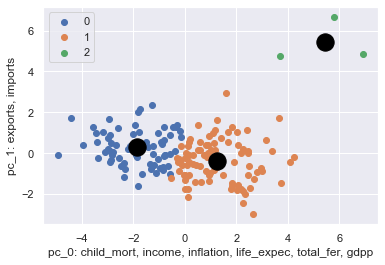

In [19]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('sc_p',StandardScaler()),
    ('pca_p',PCA(2)),
    ('kmeans_fin_p',KMeans(3))
])
pipe.fit(dataset)
u_labels=np.unique(pipe[-1].labels_)

for i in u_labels:
    plt.scatter(pc[pipe[-1].labels_==i,0],pc[pipe[-1].labels_==i,1],label=f'{i}')
plt.scatter(pipe[-1].cluster_centers_[:,0],pipe[-1].cluster_centers_[:,1],color='black',
            marker='o',s=300)
plt.legend()
plt.xlabel('pc_0: child_mort, income, inflation, life_expec, total_fer, gdpp')
plt.ylabel('pc_1: exports, imports')

In [20]:
'''insights from above plot
cluster 0: these countries have all low values, 
    so high priority for selection
cluster 1: these countries have all medium values but less imports, exports, 
    so medium priority for selection
cluster 2: these countries have all high values (i.e, rich countries), 
    so very less priority of selection
'''

'insights from above plot\ncluster 0: these countries have all low values, \n    so high priority for selection\ncluster 1: these countries have all medium values but less imports, exports, \n    so medium priority for selection\ncluster 2: these countries have all high values (i.e, rich countries), \n    so very less priority of selection\n'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

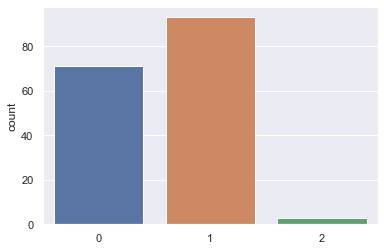

In [21]:
sns.countplot(pipe[-1].labels_)

In [22]:
# countries to be selected
list(dataset_org.iloc[pipe[-1].labels_==0,0])

['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [23]:
# for pipe.predict(), closest cluster is assigned to test point